In [111]:
import pip
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
cd C:\Users\theja\Desktop\main.PC\MoState\S4Fall\Data Mining 535\Project

C:\Users\theja\Desktop\main.PC\MoState\S4Fall\Data Mining 535\Project


In [113]:
os.system('pip install yfinance')
os.system('pip install plotly')
import yfinance as yf

In [114]:
import datetime
#oweek = current - datetime.timedelta(days=7)
current = date.today()
one_week = current - datetime.timedelta(days=7)
two_week = one_week - datetime.timedelta(days=7)
three_week = two_week - datetime.timedelta(days=7)
four_week = three_week - datetime.timedelta(days=7)

In [115]:
df = pd.DataFrame()
vals_w1 = []
vals_w2 = []
vals_w3 = []
vals_w4 = []
avg_vals = []
stock_list = {
    'Microsoft': 'MSFT', 
    'Amazon': 'AMZN', 
    'Tesla': 'TSLA',
    'Netflix': 'NFLX',
    'Snap': 'SNAP',
    'Bank of America': 'BAC',
    'JPMorgan Chase': 'JPM',
    'Mastercard': 'MA',
    'American Express': 'AXP',
    'Capital One': 'COF',
    'Nestle': 'NSRGY',
    'PepsiCo': 'PEP',
    'Uilever': 'UL',
    'Monster': 'MNST',
    'Hershey': 'HSY',
    'Abbott': 'ABT',
    'ResMed': 'RMD',
    'Penn': 'PENN',
    'ABIOMED': 'ABMD',
    'Pfizer': 'PFE',
}
tickers = list(stock_list.values())
company = list(stock_list.keys())

#determine average price each weel
#determine open - close average for each week for one month
for name in tickers:
    df = yf.download(tickers=name, period='5d', interval='1h',start=one_week,end=current)
    op = df['Open'].mean()
    cl = df['Close'].mean()
    avg_wk1 = (op + cl) / 2
    vals_w1.append(op - cl)
    df = yf.download(tickers=name, period='5d', interval='1h',start=two_week,end=one_week)
    op = df['Open'].mean()
    cl = df['Close'].mean()
    avg_wk2 = (op + cl) / 2
    vals_w2.append(op - cl)
    df = yf.download(tickers=name, period='5d', interval='1h',start=three_week,end=two_week)
    op = df['Open'].mean()
    cl = df['Close'].mean()
    avg_wk3 = (op + cl) / 2
    vals_w3.append(op - cl)
    df = yf.download(tickers=name, period='5d', interval='1h',start=four_week,end=three_week)
    op = df['Open'].mean()
    cl = df['Close'].mean()
    avg_wk4 = (op + cl) / 2
    vals_w4.append(op - cl)
    avg_vals.append((avg_wk1+avg_wk2+avg_wk3+avg_wk4)/4)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [116]:
#Calulate the total of the mean open/closes
#Calculate the total of all the average prices
totals = []
avg_total = 0

for i in range(0,20):
    totals.append(vals_w1[i] + vals_w2[i] + vals_w3[i] + vals_w4[i])
    avg_total += avg_vals[i]
    
df = pd.DataFrame({'Stock': tickers, 'Mean Week Total': totals, 'Average Value' : avg_vals})
    
print(df)

    Stock  Mean Week Total  Average Value
0    MSFT         0.437785     334.945819
1    AMZN        11.853122    3541.907568
2    TSLA         0.997250    1084.443853
3    NFLX         3.123669     655.611556
4    SNAP         0.191865      50.800097
5     BAC         0.127311      46.063998
6     JPM         0.386154     163.687972
7      MA         0.283074     337.377410
8     AXP         0.698670     168.792038
9     COF         0.445806     150.861983
10  NSRGY         0.162554     131.375491
11    PEP         0.067936     163.553731
12     UL         0.084795      52.008196
13   MNST         0.282851      88.535072
14    HSY         0.042714     179.315482
15    ABT         0.064372     128.062717
16    RMD         0.611297     258.636805
17   PENN         0.135745      53.076977
18   ABMD         2.318306     333.252852
19    PFE        -0.029409      51.713973


In [117]:
#algorithm for determining value of change
pct_of_total = []
calculated_mean = []
for i in range(0,20):
    pct_of_total.append(avg_vals[i] / avg_total)
    calculated_mean.append(totals[i] / pct_of_total[i])
    
df.insert(len(df.columns),'Mean Change', calculated_mean)
print(df)

    Stock  Mean Week Total  Average Value  Mean Change
0    MSFT         0.437785     334.945819    10.422305
1    AMZN        11.853122    3541.907568    26.685359
2    TSLA         0.997250    1084.443853     7.332875
3    NFLX         3.123669     655.611556    37.992326
4    SNAP         0.191865      50.800097    30.116813
5     BAC         0.127311      46.063998    22.038415
6     JPM         0.386154     163.687972    18.811412
7      MA         0.283074     337.377410     6.690535
8     AXP         0.698670     168.792038    33.006380
9     COF         0.445806     150.861983    23.563703
10  NSRGY         0.162554     131.375491     9.866446
11    PEP         0.067936     163.553731     3.312210
12     UL         0.084795      52.008196    13.001015
13   MNST         0.282851      88.535072    25.475314
14    HSY         0.042714     179.315482     1.899446
15    ABT         0.064372     128.062717     4.008246
16    RMD         0.611297     258.636805    18.846885
17   PENN 

In [118]:
#assign buy, hold, or sell value to each stock
#based on value of change
bsh = []
colors = []
for i in range(0,20):
    if (calculated_mean[i] > 10):
        bsh.append('Buy')
        colors.append('g')
    if ((calculated_mean[i] < 10) & (calculated_mean[i] > 0)):
        bsh.append("Hold")
        colors.append('y')
    if (calculated_mean[i] < 0):
        bsh.append("Sell")
        colors.append('b')
        
df.insert(len(df.columns), 'Buy Hold or Sell', bsh)
print(df)

    Stock  Mean Week Total  Average Value  Mean Change Buy Hold or Sell
0    MSFT         0.437785     334.945819    10.422305              Buy
1    AMZN        11.853122    3541.907568    26.685359              Buy
2    TSLA         0.997250    1084.443853     7.332875             Hold
3    NFLX         3.123669     655.611556    37.992326              Buy
4    SNAP         0.191865      50.800097    30.116813              Buy
5     BAC         0.127311      46.063998    22.038415              Buy
6     JPM         0.386154     163.687972    18.811412              Buy
7      MA         0.283074     337.377410     6.690535             Hold
8     AXP         0.698670     168.792038    33.006380              Buy
9     COF         0.445806     150.861983    23.563703              Buy
10  NSRGY         0.162554     131.375491     9.866446             Hold
11    PEP         0.067936     163.553731     3.312210             Hold
12     UL         0.084795      52.008196    13.001015          

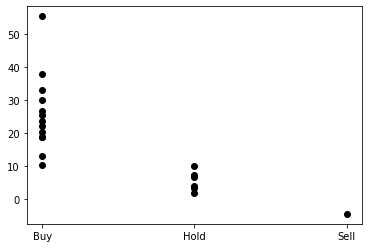

In [119]:
#Show values of change on scatterplot graph
plt.scatter(df['Buy Hold or Sell'], 
                df['Mean Change'],
                color = 'black')

In [120]:
#Save final dataframe to a CSV file
df.to_csv('Final Classification.csv')